In [68]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Extend PATH Variable
import sys
sys.path.append("../../../src/")

# NanoNets Simulation Tool
import nanonets
import nanonets_utils

from scipy.optimize import curve_fit

In [69]:
def return_cubic_topology(N):

    topology_parameter = {
        "Nx"    : N,
        "Ny"    : N,
        "Nz"    : 1,
        "e_pos" : [[0,0,0],[N-1,N-1,0]]
    }

    return topology_parameter

def return_string_topology(N):

    topology_parameter = {
        "Nx"    : N,
        "Ny"    : 1,
        "Nz"    : 1,
        "e_pos" : [[0,0,0],[N-1,0,0]]
    }

    return topology_parameter

def return_random_topology(N):

    topology_parameter = {
        "Np"    : N,
        "Nj"    : 4,
        "e_pos" : [[-1,-1],[1,1]]
    }

    return topology_parameter

def fit_func(x, a, b, c):
    return a * (x - b) + c

## Cubic Network of Nanoparticles

In [70]:
V_min   = 0
V_max   = 0.1
V_arr   = np.linspace(V_min, V_max, 100, endpoint=True)
jpb     = 5000
N_min   = 3
N_max   = 6
data    = {input_at : {N : pd.read_csv(f"data/Nx={N}_Ny={N}_Nz=1_Ne=8_jpb_{jpb}_E{input_at}.csv") for N in range(3,N_max+1)} for input_at in [0,1,3,5]}

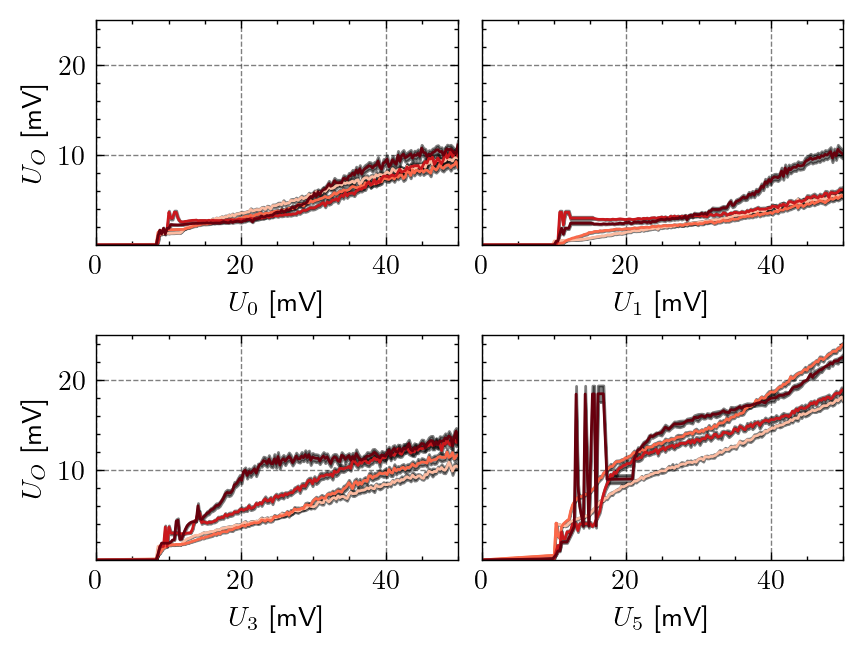

In [71]:
cmap = plt.get_cmap('Reds')

with plt.style.context(["science", "bright", "grid"]):

    fig = plt.figure(dpi=200, layout='constrained')
    fig.set_figheight(fig.get_figheight()*1.2)
    fig.set_figwidth(fig.get_figwidth()*1.2)
    
    for n, (input_at, results) in enumerate(data.items()):

        ax  = fig.add_subplot(2,2,n+1)

        for i, (key, df) in enumerate(results.items()):

            df  = df.sort_values(by=f'E{input_at}').reset_index(drop=True)
            x   = df[f'E{input_at}']*1000
            y   = df['Current']*1000
            ye  = df['Error']*1000

            ax.plot(x, y, c=cmap((i+1)/len(results.keys())))
            ax.fill_between(x, y-ye, y+ye, color='black', alpha=0.5)

        ax.set_xlabel(f"$U_{input_at}$ [mV]")

        if n % 2 == 0:
            ax.set_ylabel("$U_O$ [mV]")
        else:
            ax.set_yticklabels("")

        ax.set_xlim(0,50)
        ax.set_ylim(0.01,25)
        # ax.set_yscale('log')

## Random Network of Nanoparticles

In [43]:
V_min   = 0
V_max   = 0.1
V_arr   = np.linspace(V_min, V_max, 100, endpoint=True)
jpb     = 1000
N_min   = 3
N_max   = 9
data_d  = {input_at : {N*N : pd.read_csv(f"data_disorder/Np={N*N}_Nj=0_Ne=8_jpb_{jpb}_E{input_at}.csv") for N in range(3,N_max+1)} for input_at in [0,1,3,5]}

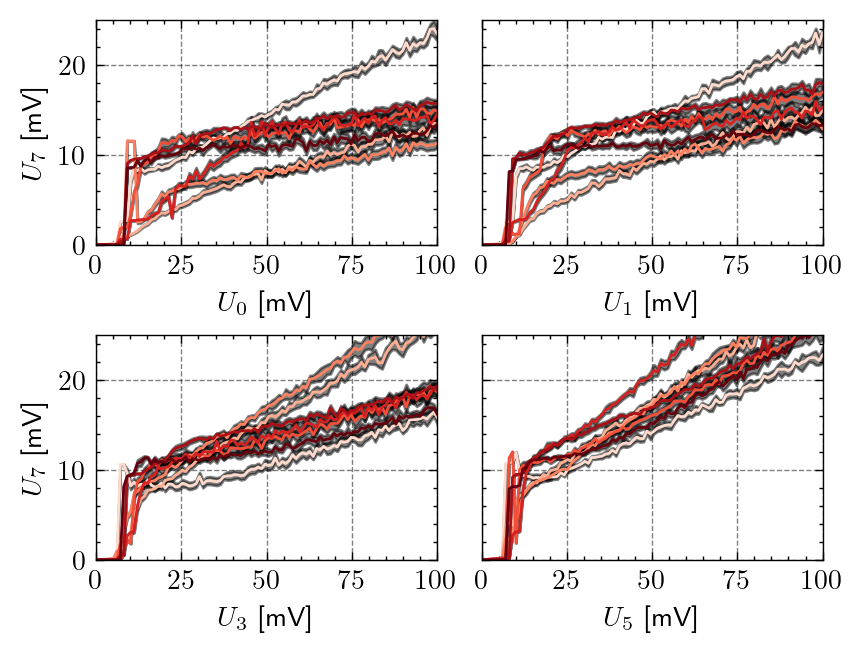

In [44]:
cmap = plt.get_cmap('Reds')

with plt.style.context(["science", "bright", "grid"]):

    fig = plt.figure(dpi=200, layout='constrained')
    fig.set_figheight(fig.get_figheight()*1.2)
    fig.set_figwidth(fig.get_figwidth()*1.2)
    
    for n, (input_at, results) in enumerate(data_d.items()):

        ax  = fig.add_subplot(2,2,n+1)

        for i, (key, df) in enumerate(results.items()):

            df  = df.sort_values(by=f'E{input_at}').reset_index(drop=True)
            x   = df[f'E{input_at}']*1000
            y   = df['Current']*1000
            ye  = df['Error']*1000

            ax.plot(x, y, c=cmap((i+1)/len(results.keys())))
            ax.fill_between(x, y-ye, y+ye, color='black', alpha=0.5)

        ax.set_xlabel(f"$U_{input_at}$ [mV]")

        if n % 2 == 0:
            ax.set_ylabel("$U_7$ [mV]")
        else:
            ax.set_yticklabels("")

        ax.set_xlim(0,100)
        ax.set_ylim(0,25)

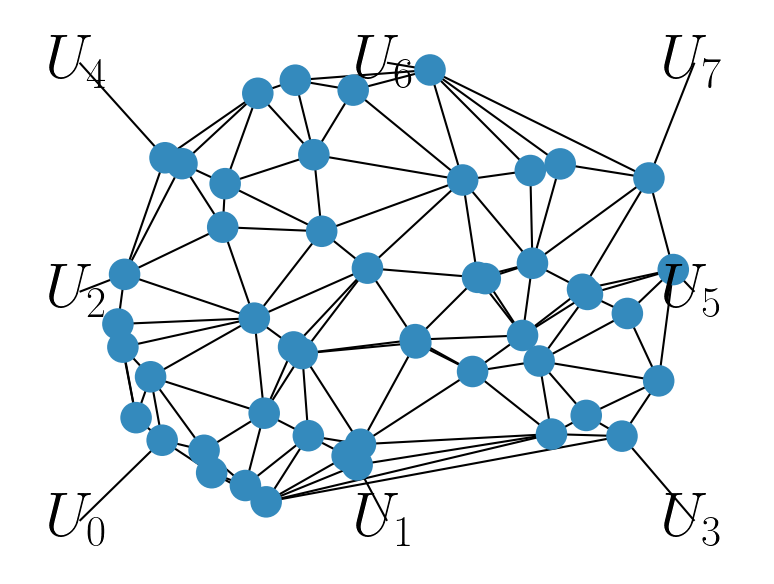

In [45]:
N           = 7
t_arr       =    {
    "Np"                :   N*N,
    "Nj"                :   0,
    "e_pos"             :   [[-1,-1],[0,-1],[-1,0],[1,-1],[-1,1],[1,0],[0,1],[1,1]],
    "electrode_type"    :   ['constant','constant','constant','constant','constant','constant','constant','floating']
} 
sim_class   = nanonets.simulation(topology_parameter=t_arr, seed=0)

fig     = plt.figure(dpi=150)
ax      = fig.add_subplot()
fig, ax = nanonets_utils.display_network(sim_class, fig=fig, ax=ax, node_size=200, provide_electrode_labels=[f"$U_{i}$" for i in range(8)], font_size=30)

---

In [46]:
results_s   = {N : pd.read_csv(f"data/mean_state_Nx={N}_Ny={N}_Nz=1_Ne=8_jpb_{jpb}_E{input_at}.csv") for N in range(3,N_max+1)}

for key, df in results_s.items():

    df_tmp          = df.copy()
    df_tmp[-1]      = results[key][f'E{input_at}']
    results_s[key]  = df_tmp[[-1,f'{key*key//2-1}']].sort_values(by=-1).reset_index(drop=True)

FileNotFoundError: [Errno 2] No such file or directory: 'data/mean_state_Nx=3_Ny=3_Nz=1_Ne=8_jpb_1000_E5.csv'

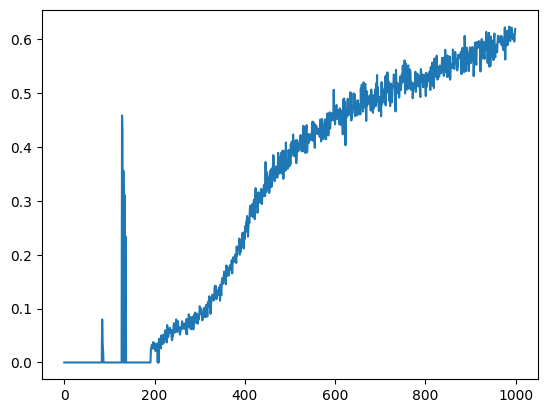

In [19]:
plt.plot(results_s[7].iloc[:,-1])

In [6]:
p_vals = []

for N in results.keys():

    p, cov = curve_fit(fit_func, V_arr, results_new[N][:,2])

    p_vals.append(p)

slopes  = np.array([p[0] for p in p_vals])
scale   = slopes[4]/slopes
p, cov  = curve_fit(fit_func, np.arange(N_min,N_max+1)**2, scale)

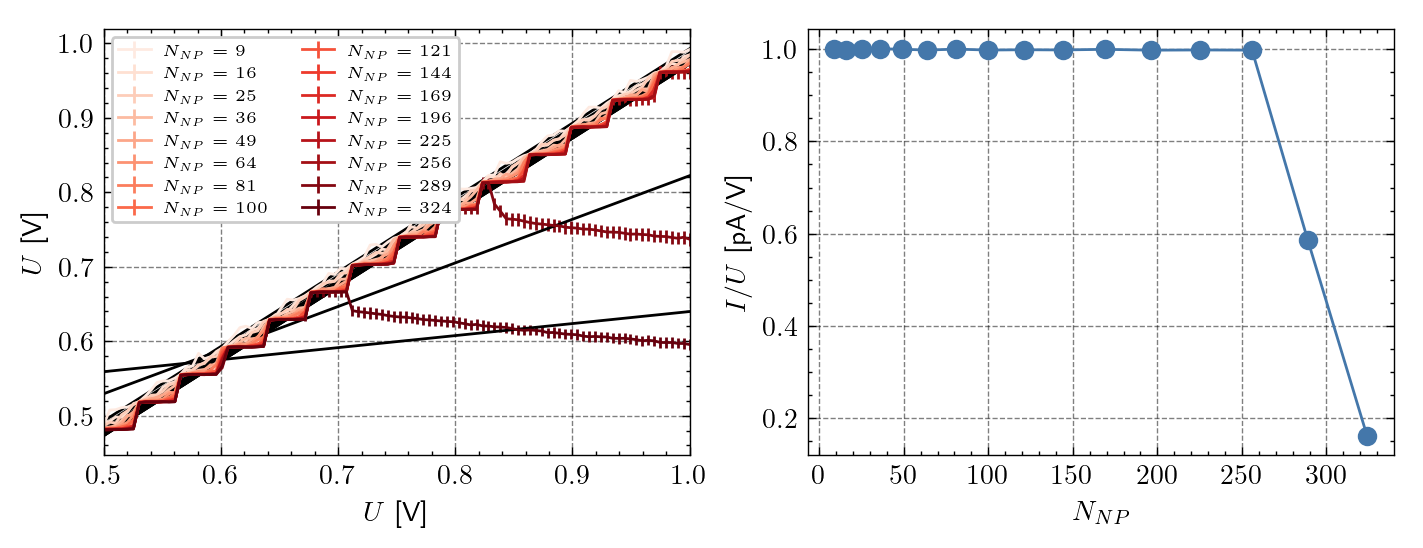

In [30]:
cmap = plt.get_cmap('Reds')

with plt.style.context(["science", "bright", "grid"]):

    fig = plt.figure(dpi=200, layout='constrained')
    fig.set_figwidth(fig.get_figwidth()*2)
    ax  = fig.add_subplot(1,2,1)

    for i, N in enumerate(range(N_min,N_max+1)):

        ax.errorbar(V_arr, results_new[N][:,2], results_new[N][:,3], c=cmap((i+1)/len(results_new.keys())), label='$N_{NP} = '+f' {N*N}$')
        ax.plot(V_arr, fit_func(V_arr, *p_vals[i]), 'black')
    
    ax.set_ylabel("$U$ [V]")
    ax.set_xlabel("$U$ [V]")
    ax.legend(fontsize='xx-small', ncol=2)
    ax.set_xlim(0.5,1.0)

    ax  = fig.add_subplot(1,2,2)

    ax.plot(np.arange(N_min,N_max+1)**2, slopes, '-o')
    ax.set_ylabel('$I/U$ [pA/V]')
    ax.set_xlabel("$N_{NP}$")
    # ax.set_xlim(0,150)
    # fig.savefig("docs/I_V_cubic_network.png")

In [7]:
np.round(scale,2)

array([0.75, 0.82, 0.89, 0.96, 1.  , 1.06, 1.11, 1.17, 1.22, 1.28, 1.33,
       1.41, 1.5 , 1.62, 1.85, 2.13])

## Disorderd Network of Nanoparticles

In [126]:
V_min   = 0.5
V_max   = 1.0
V_arr   = np.linspace(V_min, V_max, 100, endpoint=True)

N_min       = 10
N_max       = 310
results     = {N : {thread : np.loadtxt(f"data_disorder/N_{N}_th_{thread}.csv") for thread in range(20)} for N in np.arange(N_min,N_max+1,20)}
results_new = {key : np.mean([dic[key2] for key2 in dic.keys()], axis=0) for key, dic in results.items()}

In [127]:
p_vals = []

for N in results.keys():

    p, cov = curve_fit(fit_func, V_arr, results_new[N][:,2])

    p_vals.append(p)

slopes  = np.array([p[0] for p in p_vals])
scale   = slopes[2]/slopes
p, cov  = curve_fit(fit_func, np.arange(N_min,N_max+1,20), scale)

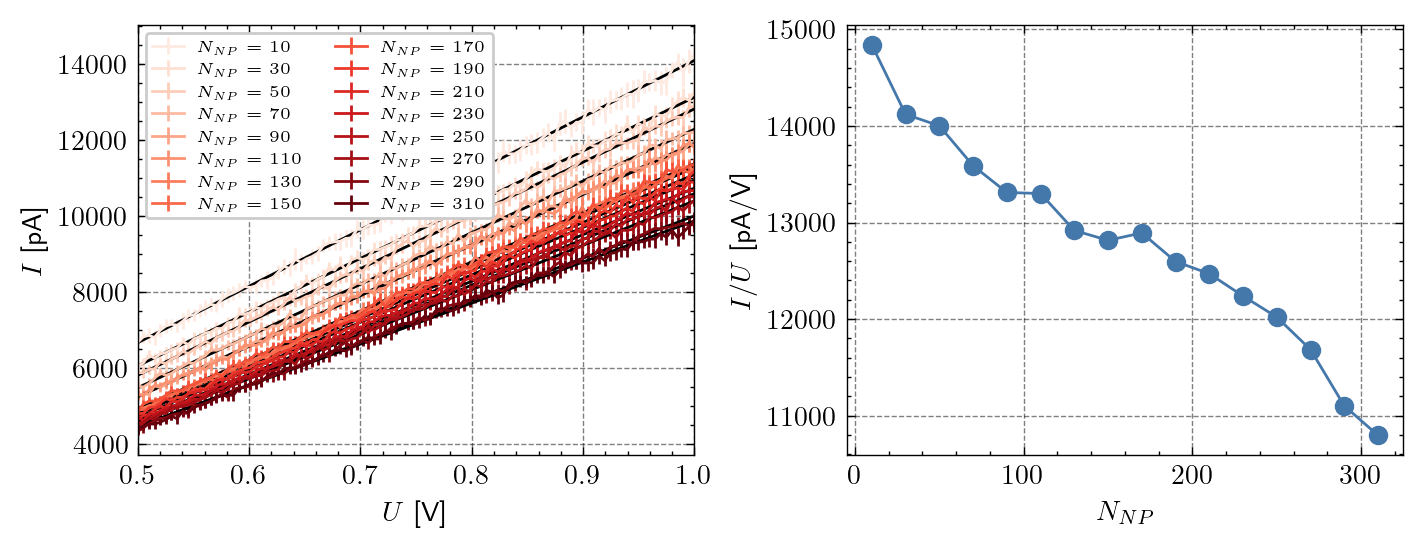

In [128]:
cmap = plt.get_cmap('Reds')

with plt.style.context(["science", "bright", "grid"]):

    fig = plt.figure(dpi=200, layout='constrained')
    fig.set_figwidth(fig.get_figwidth()*2)
    ax  = fig.add_subplot(1,2,1)

    for i, N in enumerate(np.arange(N_min,N_max+1,20)):

        ax.errorbar(V_arr, results_new[N][:,2], results_new[N][:,3], c=cmap((i+1)/len(results_new.keys())), label='$N_{NP} = '+f' {N}$')
        ax.plot(V_arr, fit_func(V_arr, *p_vals[i]), 'black')
    
    ax.set_ylabel("$I$ [pA]")
    ax.set_xlabel("$U$ [V]")
    ax.legend(fontsize='xx-small', ncol=2)
    ax.set_xlim(0.5,1.0)

    ax  = fig.add_subplot(1,2,2)

    ax.plot(np.arange(N_min,N_max+1,20), slopes, '-o')
    ax.set_ylabel('$I/U$ [pA/V]')
    ax.set_xlabel("$N_{NP}$")
    # ax.set_xlim(0,150)
    fig.savefig("docs/I_V_disorderd_network.png")

In [129]:
np.round(scale,2)

array([0.94, 0.99, 1.  , 1.03, 1.05, 1.05, 1.08, 1.09, 1.09, 1.11, 1.12,
       1.14, 1.16, 1.2 , 1.26, 1.3 ])

## Equilibrium Runs

In [79]:
V_min   = 0.5
V_max   = 1.0
V_arr   = np.linspace(V_min, V_max, 100, endpoint=True)

pre_jumps   = [0,10,50,100,500,1000,5000,10000,50000,100000,500000,1000000]
N_min       = 3
N_max       = 18
results     = {N : {eq_steps : np.loadtxt(f"data_equilibrium/N_{N}_th_{eq_steps}.csv") for eq_steps in pre_jumps} for N in np.arange(N_min,N_max+1)}

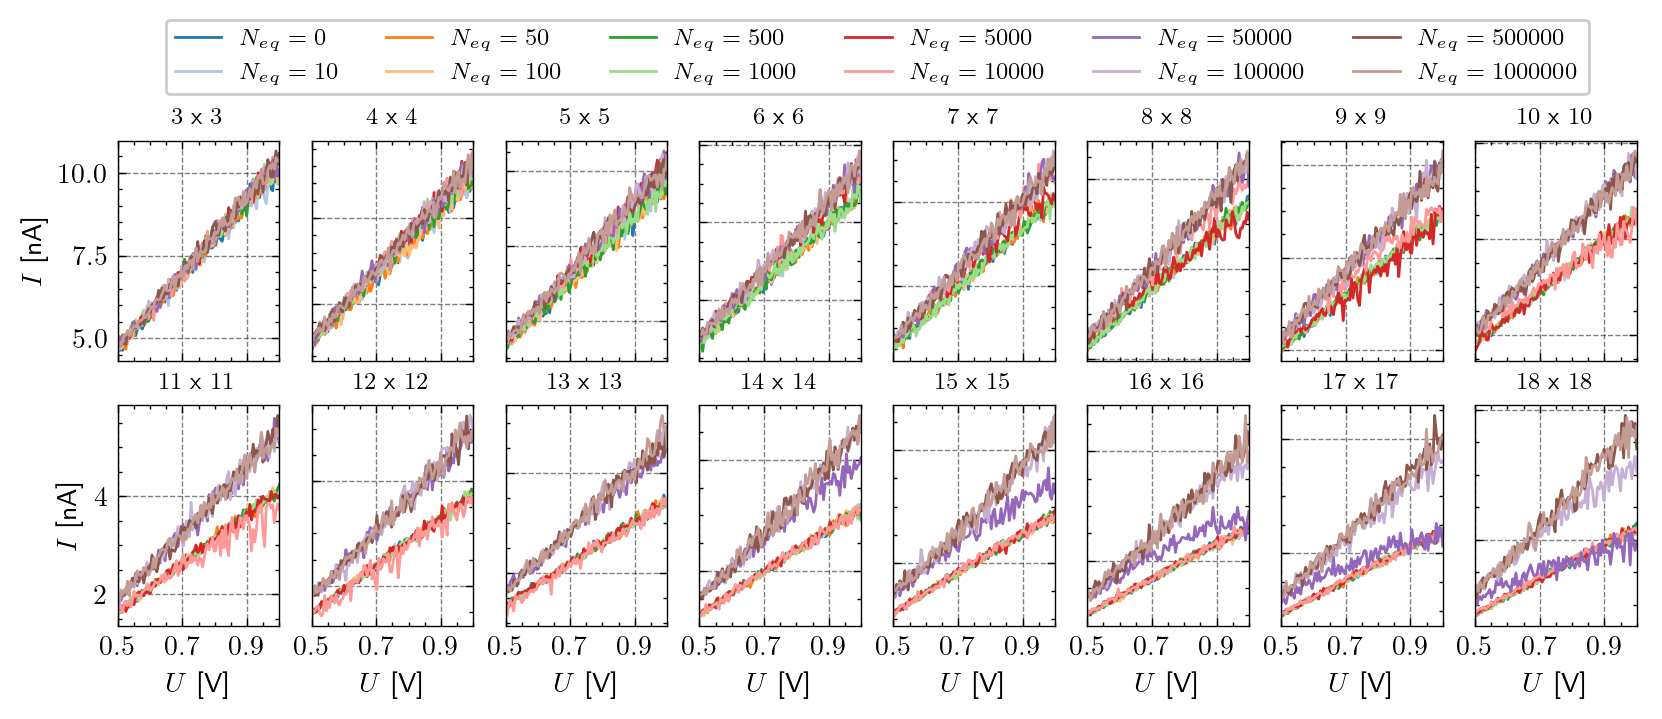

In [96]:
nrows   = 2
ncols   = 8
cmap    = plt.get_cmap('tab20')

with plt.style.context(["science", "bright", "grid"]):

    fig = plt.figure(dpi=200)
    fig.set_figwidth(fig.get_figwidth()*2.8)
    fig.set_figheight(fig.get_figheight()*1.2)

    for i, N in enumerate(range(N_min,N_max+1)):  

        ax = fig.add_subplot(nrows,ncols,i+1)

        for j, eq_jumps in enumerate(pre_jumps):

            ax.plot(V_arr, results[N][eq_jumps][:,2]/1000, label='$N_{eq}'+f' = {eq_jumps}$', c=cmap((j+0.5)/20))
        
        if i % ncols != 0:
            ax.set_yticklabels("")
        else:
            ax.set_ylabel("$I$ [nA]")
        
        if i < (nrows-1)*ncols:
            ax.set_xticklabels("")
        else:
            ax.set_xlabel("$U$ [V]")
        
        ax.set_xlim(0.5,1.0)
    
        if i == 0:
            ax.legend(fontsize='small', bbox_to_anchor=(4.7,1.38), loc='center', ncols=6)
        
        ax.set_xticks([0.5,0.7,0.9])
        ax.set_title(f"${N}$ x ${N}$", fontsize='small')

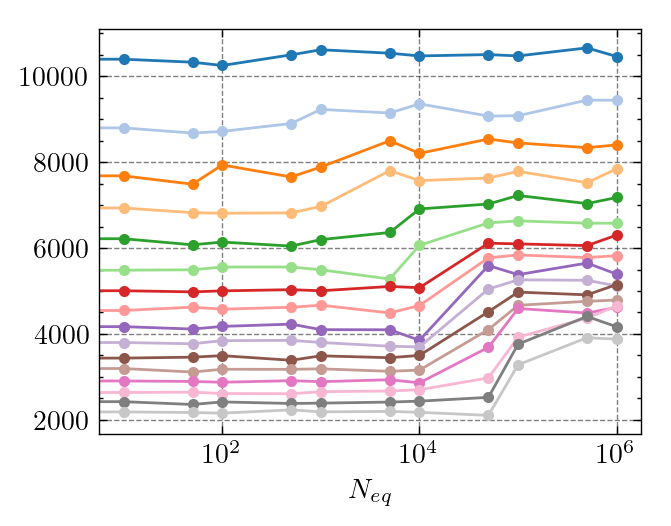

In [115]:
with plt.style.context(["science", "bright", "grid"]):

    fig = plt.figure(dpi=200)
    ax  = fig.add_subplot()

    for j, N in enumerate(range(N_min, N_max+1)):
        
        vals = [np.max(results[N][eq_jumps][:,2]) for eq_jumps in pre_jumps]

        ax.plot(pre_jumps, vals, '.-', c=cmap((j+0.5)/20))
    
    ax.set_xscale('log')
    ax.set_xlabel('$N_{eq}$')

In [ ]:
[10000,10000,10000,10000,50000,50000,100000,100000,100000,100000]

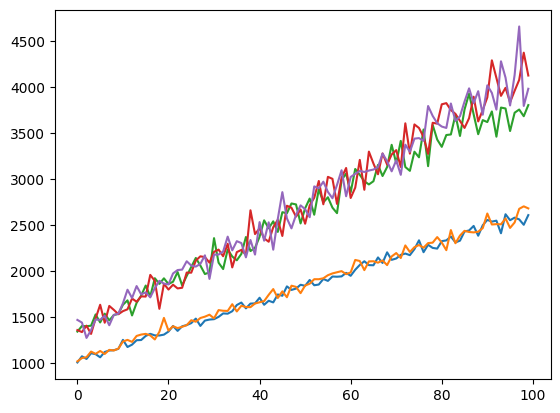

In [82]:
plt.plot(results[16][0][:,2])
plt.plot(results[16][10000][:,2])
plt.plot(results[16][100000][:,2])
plt.plot(results[16][500000][:,2])
plt.plot(results[16][1000000][:,2])

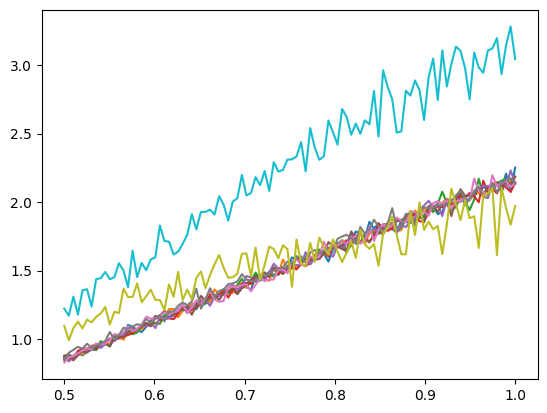

In [64]:
for j, eq_jumps in enumerate(pre_jumps):

    plt.plot(V_arr, results[18][eq_jumps][:,2]/1000)

In [14]:
# Node positions
N_particles = 50
seed        = 0

rng         = np.random.RandomState(seed)
angles      = rng.uniform(0,2*np.pi, N_particles)
radii       = np.sqrt(rng.uniform(0, 1, N_particles))
pos         = [(r * np.cos(a), r * np.sin(a)) for r, a in zip(radii, angles)]

G  = nx.Graph()

for i, p in enumerate(pos):
    G.add_node(i, pos=p)

tri     = Delaunay(pos)
edges   = set()
for simplex in tri.simplices:
    for i in range(3):
        edge = tuple(sorted([simplex[i], simplex[(i+1) % 3]]))
        edges.add(edge)

edges = list(edges)
G.add_edges_from(edges)
pos = {i : p for i, p in enumerate(pos)}

nx.draw(G, pos)

NameError: name 'nx' is not defined

---

In [ ]:
results_c_new   = {}
V_arr           = np.zeros((250,3))
V_min           = 0.0
V_max           = 1.0

for i,N in enumerate(range(3,13)):

    V_arr[:,0]          = scale[i]*np.linspace(V_min, V_max, 250, endpoint=True)
    topology_parameter  = return_cubic_topology(N)
    np_network_cubic    = nanonets.simulation(network_topology='cubic', topology_parameter=topology_parameter)
    
    np_network_cubic.run_const_voltages(V_arr, 1, save_th=0.1)

    results_c_new[N] = np_network_cubic.return_output_values()

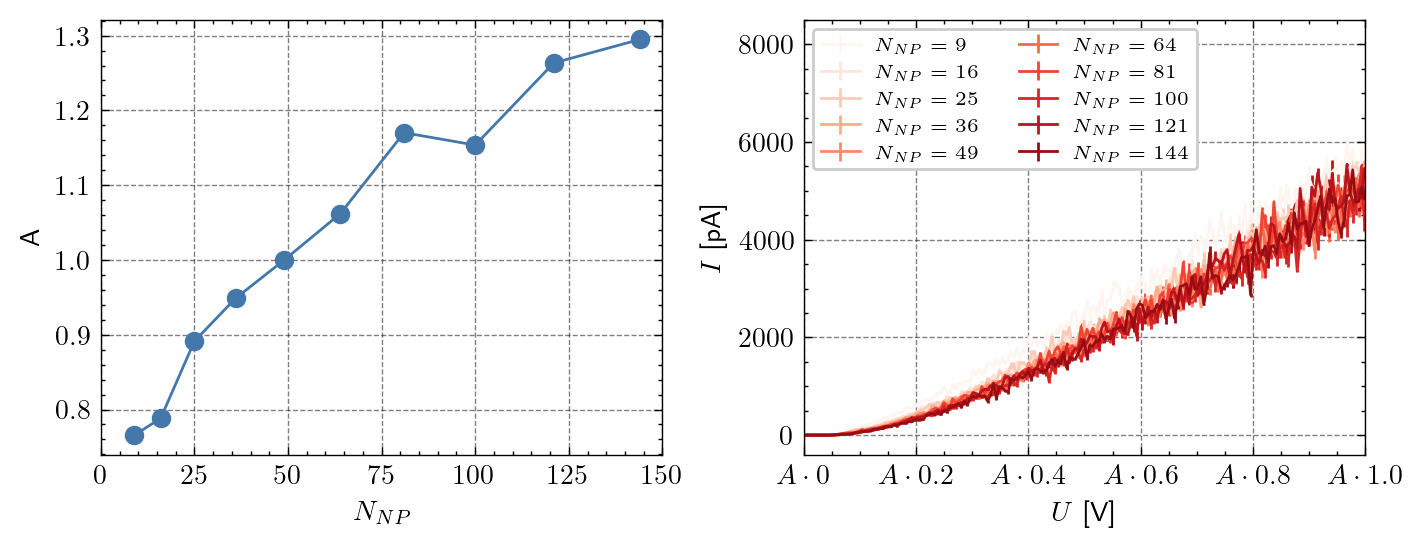

In [ ]:
with plt.style.context(["science", "bright", "grid"]):

    fig = plt.figure(dpi=200, layout='constrained')
    fig.set_figwidth(fig.get_figwidth()*2)
    ax  = fig.add_subplot(1,2,1)
    ax.plot(np.arange(3,13)**2, scale, '-o')
    ax.set_xlim(0,150)
    ax.set_xlabel("$N_{NP}$")
    ax.set_ylabel("A")

    ax  = fig.add_subplot(1,2,2)
    for i, N in enumerate(range(3,13)):

        ax.errorbar(V_arr[:,0], results_c_new[N][:,2], results_c_new[N][:,3], c=cmap(i/len(results_c_new.keys())), label='$N_{NP} = '+f' {N*N}$')
    
    ax.set_ylabel("$I$ [pA]")
    ax.set_xlabel("$U$ [V]")
    ax.legend(fontsize='x-small', ncol=2)
    ax.set_xlim(0.0,1.0)
    ax.set_xticks([0,0.2,0.4,0.6,0.8,1.0])
    ax.set_xticklabels([f"$A \cdot {i}$" for i in [0,0.2,0.4,0.6,0.8,1.0]])
    # fig.savefig("docs/I_V_cubic_network_after_scaling.png")

In [12]:
p, cov = curve_fit(fit_func, np.arange(3,13)**2, scale)

In [15]:
scale_new = fit_func(np.arange(3,13)**2, *p)
scale_new

array([0.8141392 , 0.84185059, 0.87747953, 0.921026  , 0.97249001,
       1.03187156, 1.09917066, 1.17438729, 1.25752146, 1.34857318])

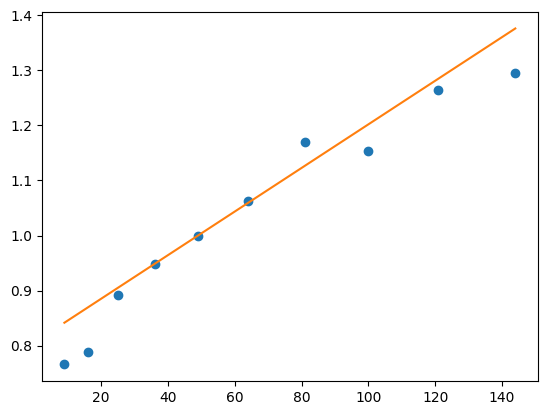

In [17]:
plt.plot(np.arange(3,13)**2, scale, 'o')
plt.plot(np.arange(3,13)**2, fit_func(np.arange(3,13)**2, *p) + (1 - 0.97249001))

In [11]:
np.round(scale,4)

array([0.7658, 0.7883, 0.8914, 0.9488, 1.    , 1.0621, 1.1702, 1.1536,
       1.2635, 1.2949])

## Random Network

In [7]:
results_r   = {}
V_arr       = np.zeros((100,3))
V_min       = 0.5
V_max       = 1.0
V_arr[:,0]  = np.linspace(V_min, V_max, 100, endpoint=True)

for N in np.arange(10,101,5):
    stats = {}
    for s in range(10):

        topology_parameter  = return_random_topology(N)
        np_network_cubic    = nanonets.simulation(network_topology='random', topology_parameter=topology_parameter, seed=s)
        
        np_network_cubic.run_const_voltages(V_arr, 1, save_th=0.1)
        stats[s] = np_network_cubic.return_output_values()
        
    results_r[N] = stats

In [28]:
dic_r_new = {}

for N in np.arange(10,101,5):

    values = np.zeros(results_r[N][0].shape)

    for key, val in results_r[N].items():

        values += val/10

    dic_r_new[N] = values

In [36]:
p_vals = []

for N in dic_r_new.keys():

    p, cov = curve_fit(fit_func, V_arr[:,0], dic_r_new[N][:,2])

    p_vals.append(p)

In [41]:
slopes  = np.array([p[0] for p in p_vals])
# scale   = slopes[4]/slopes
# p, cov  = curve_fit(fit_func, np.arange(3,13)**2, scale)

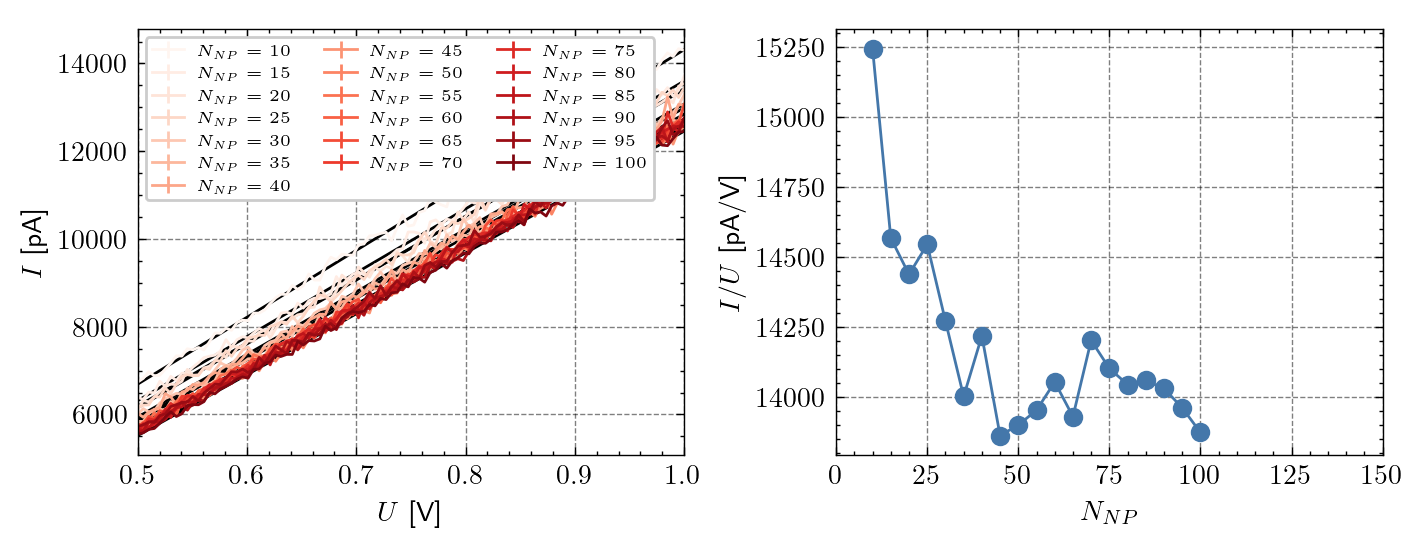

In [44]:
cmap = plt.get_cmap('Reds')

with plt.style.context(["science", "bright", "grid"]):

    fig = plt.figure(dpi=200, layout='constrained')
    fig.set_figwidth(fig.get_figwidth()*2)
    ax  = fig.add_subplot(1,2,1)

    for i, N in enumerate(np.arange(10,101,5)):

        ax.errorbar(V_arr[:,0], dic_r_new[N][:,2], 0, c=cmap(i/len(dic_r_new.keys())), label='$N_{NP} = '+f' {N}$')
        ax.plot(V_arr[:,0], fit_func(V_arr[:,0], *p_vals[i]), 'black')
    
    ax.set_ylabel("$I$ [pA]")
    ax.set_xlabel("$U$ [V]")
    ax.legend(fontsize='xx-small', ncol=3)
    ax.set_xlim(0.5,1.0)

    ax  = fig.add_subplot(1,2,2)

    ax.plot(np.arange(10,101,5), slopes, '-o')
    ax.set_ylabel('$I/U$ [pA/V]')
    ax.set_xlabel("$N_{NP}$")
    ax.set_xlim(0,150)
    # fig.savefig("docs/I_V_cubic_network.png")

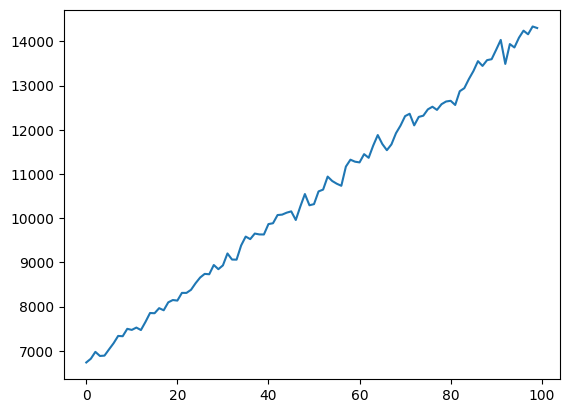

In [24]:
plt.plot(values[:,2])

## String of Nanoparticles

In [28]:
results     = {}
V_arr       = np.zeros((100,3))
V_min       = 0.5
V_max       = 1.0
V_arr[:,0]  = np.linspace(V_min, V_max, 100, endpoint=True)

for N in range(2,100,2):

    topology_parameter  = return_string_topology(N)
    np_network_cubic    = nanonets.simulation(network_topology='cubic', topology_parameter=topology_parameter)
    
    np_network_cubic.run_const_voltages(V_arr, 1, save_th=0.1)

    results[N] = np_network_cubic.return_output_values()

In [29]:
p_vals = []

for N in results.keys():

    p, cov = curve_fit(fit_func, V_arr[:,0], results[N][:,2])

    p_vals.append(p)

/home/jonas/.local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [30]:
slopes  = np.array([p[0] for p in p_vals])
scale   = slopes[5]/slopes

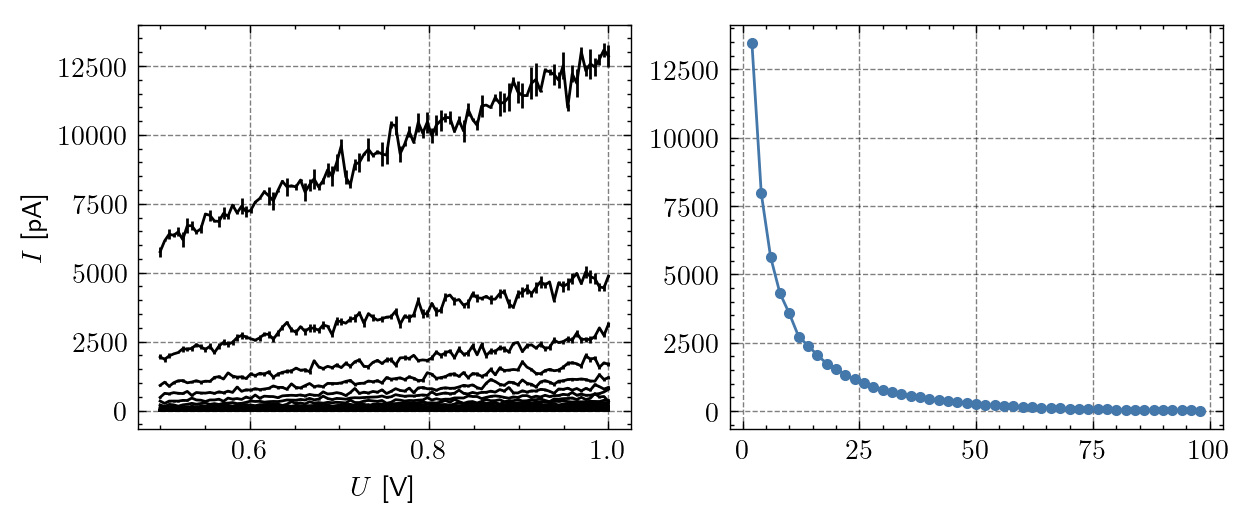

In [46]:
with plt.style.context(["science", "bright", "grid"]):

    fig = plt.figure(dpi=200)
    fig.set_figwidth(fig.get_figwidth()*2)
    ax  = fig.add_subplot(1,2,1)

    for i, N in enumerate(range(2,100,4)):

        ax.errorbar(V_arr[:,0], results[N][:,2], results[N][:,3], c='black')
        # ax.plot(V_arr[:,0], fit_func(V_arr[:,0], *p_vals[i]), 'black')
    
    ax.set_ylabel("$I$ [pA]")
    ax.set_xlabel("$U$ [V]")
    # ax.set_ylim(0,1000)

    ax  = fig.add_subplot(1,2,2)

    ax.plot(np.arange(2,100,2), slopes, '.-')